In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("./Used_fiat_500_in_Italy_dataset.csv")

In [3]:
data.head(5)

,model,engine_power,transmission,age_in_days,km,previous_owners,lat,lon,price
0,pop,69,manual,4474,56779,2,45.071079,7.46403,4490
1,lounge,69,manual,2708,160000,1,45.069679,7.70492,4500
2,lounge,69,automatic,3470,170000,2,45.514599,9.28434,4500
3,sport,69,manual,3288,132000,2,41.903221,12.49565,4700
4,sport,69,manual,3712,124490,2,45.532661,9.03892,4790


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model            380 non-null    object 
 1   engine_power     380 non-null    int64  
 2   transmission     380 non-null    object 
 3   age_in_days      380 non-null    int64  
 4   km               380 non-null    int64  
 5   previous_owners  380 non-null    int64  
 6   lat              380 non-null    float64
 7   lon              380 non-null    float64
 8   price            380 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 26.8+ KB


In [6]:
data.describe() # calcola i principali indici statistici per le colonne numeriche

,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,73.015789,3310.265789,102196.250000,1.510526,44.257712,10.742644,5881.655263
std,9.984672,1437.555063,47115.355234,0.560244,1.767518,2.167753,2170.617946
min,69.000000,91.000000,4981.000000,1.000000,37.510872,7.320720,2890.000000
25%,69.000000,3097.250000,76611.750000,1.000000,43.514196,9.159140,4600.000000
50%,69.000000,3927.000000,112000.000000,1.000000,45.069679,10.301505,5000.000000
75%,69.000000,4322.000000,135000.000000,2.000000,45.556942,12.346788,5500.000000
max,101.000000,4719.000000,259000.000000,4.000000,46.781651,18.168011,15900.000000


In [12]:
data[(data['price'] < 4000) & (data['km'] < 100_000)]

,model,engine_power,transmission,age_in_days,km,previous_owners,lat,lon,price
103,lounge,69,manual,4383,82000,2,45.467960,9.18178,3500
117,pop,69,automatic,2527,82000,1,41.769051,12.66281,3950
121,lounge,69,manual,4230,93000,1,43.616699,12.81670,3999


In [13]:
data[(data['price'] < 4000) & (data['km'] < 100_000)]["age_in_days"]

103    4383
117    2527
121    4230
Name: age_in_days, dtype: int64

## Pandas ha 2 oggetti:
- **Dataframe**: rappresentano dati in forma tabulare
- **Series**: rappresentano una serie di dati

In [4]:
cols = ["model","engine_power","age_in_days","km","lat","lon","price"]
selected_data = data[cols]
selected_data.head(5)

,model,engine_power,age_in_days,km,lat,lon,price
0,pop,69,4474,56779,45.071079,7.46403,4490
1,lounge,69,2708,160000,45.069679,7.70492,4500
2,lounge,69,3470,170000,45.514599,9.28434,4500
3,sport,69,3288,132000,41.903221,12.49565,4700
4,sport,69,3712,124490,45.532661,9.03892,4790


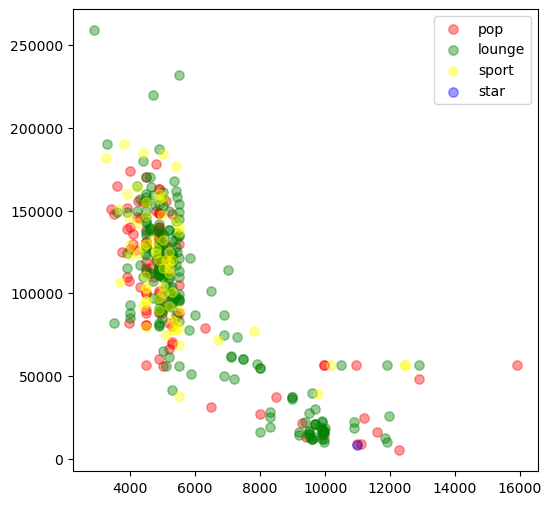

In [28]:
fig, ax = plt.subplots(figsize = (6,6))
models = {'pop': "red", 'lounge': "green", 'sport': "yellow", 'star': "blue"}
for m in models:
    # print(m)
    model_data = selected_data[selected_data["model"] == m]
    ax.scatter(model_data['price'],model_data['km'], color = models[m], alpha = 0.4, s = 45, label = m)
    ax.legend()

plt.show()

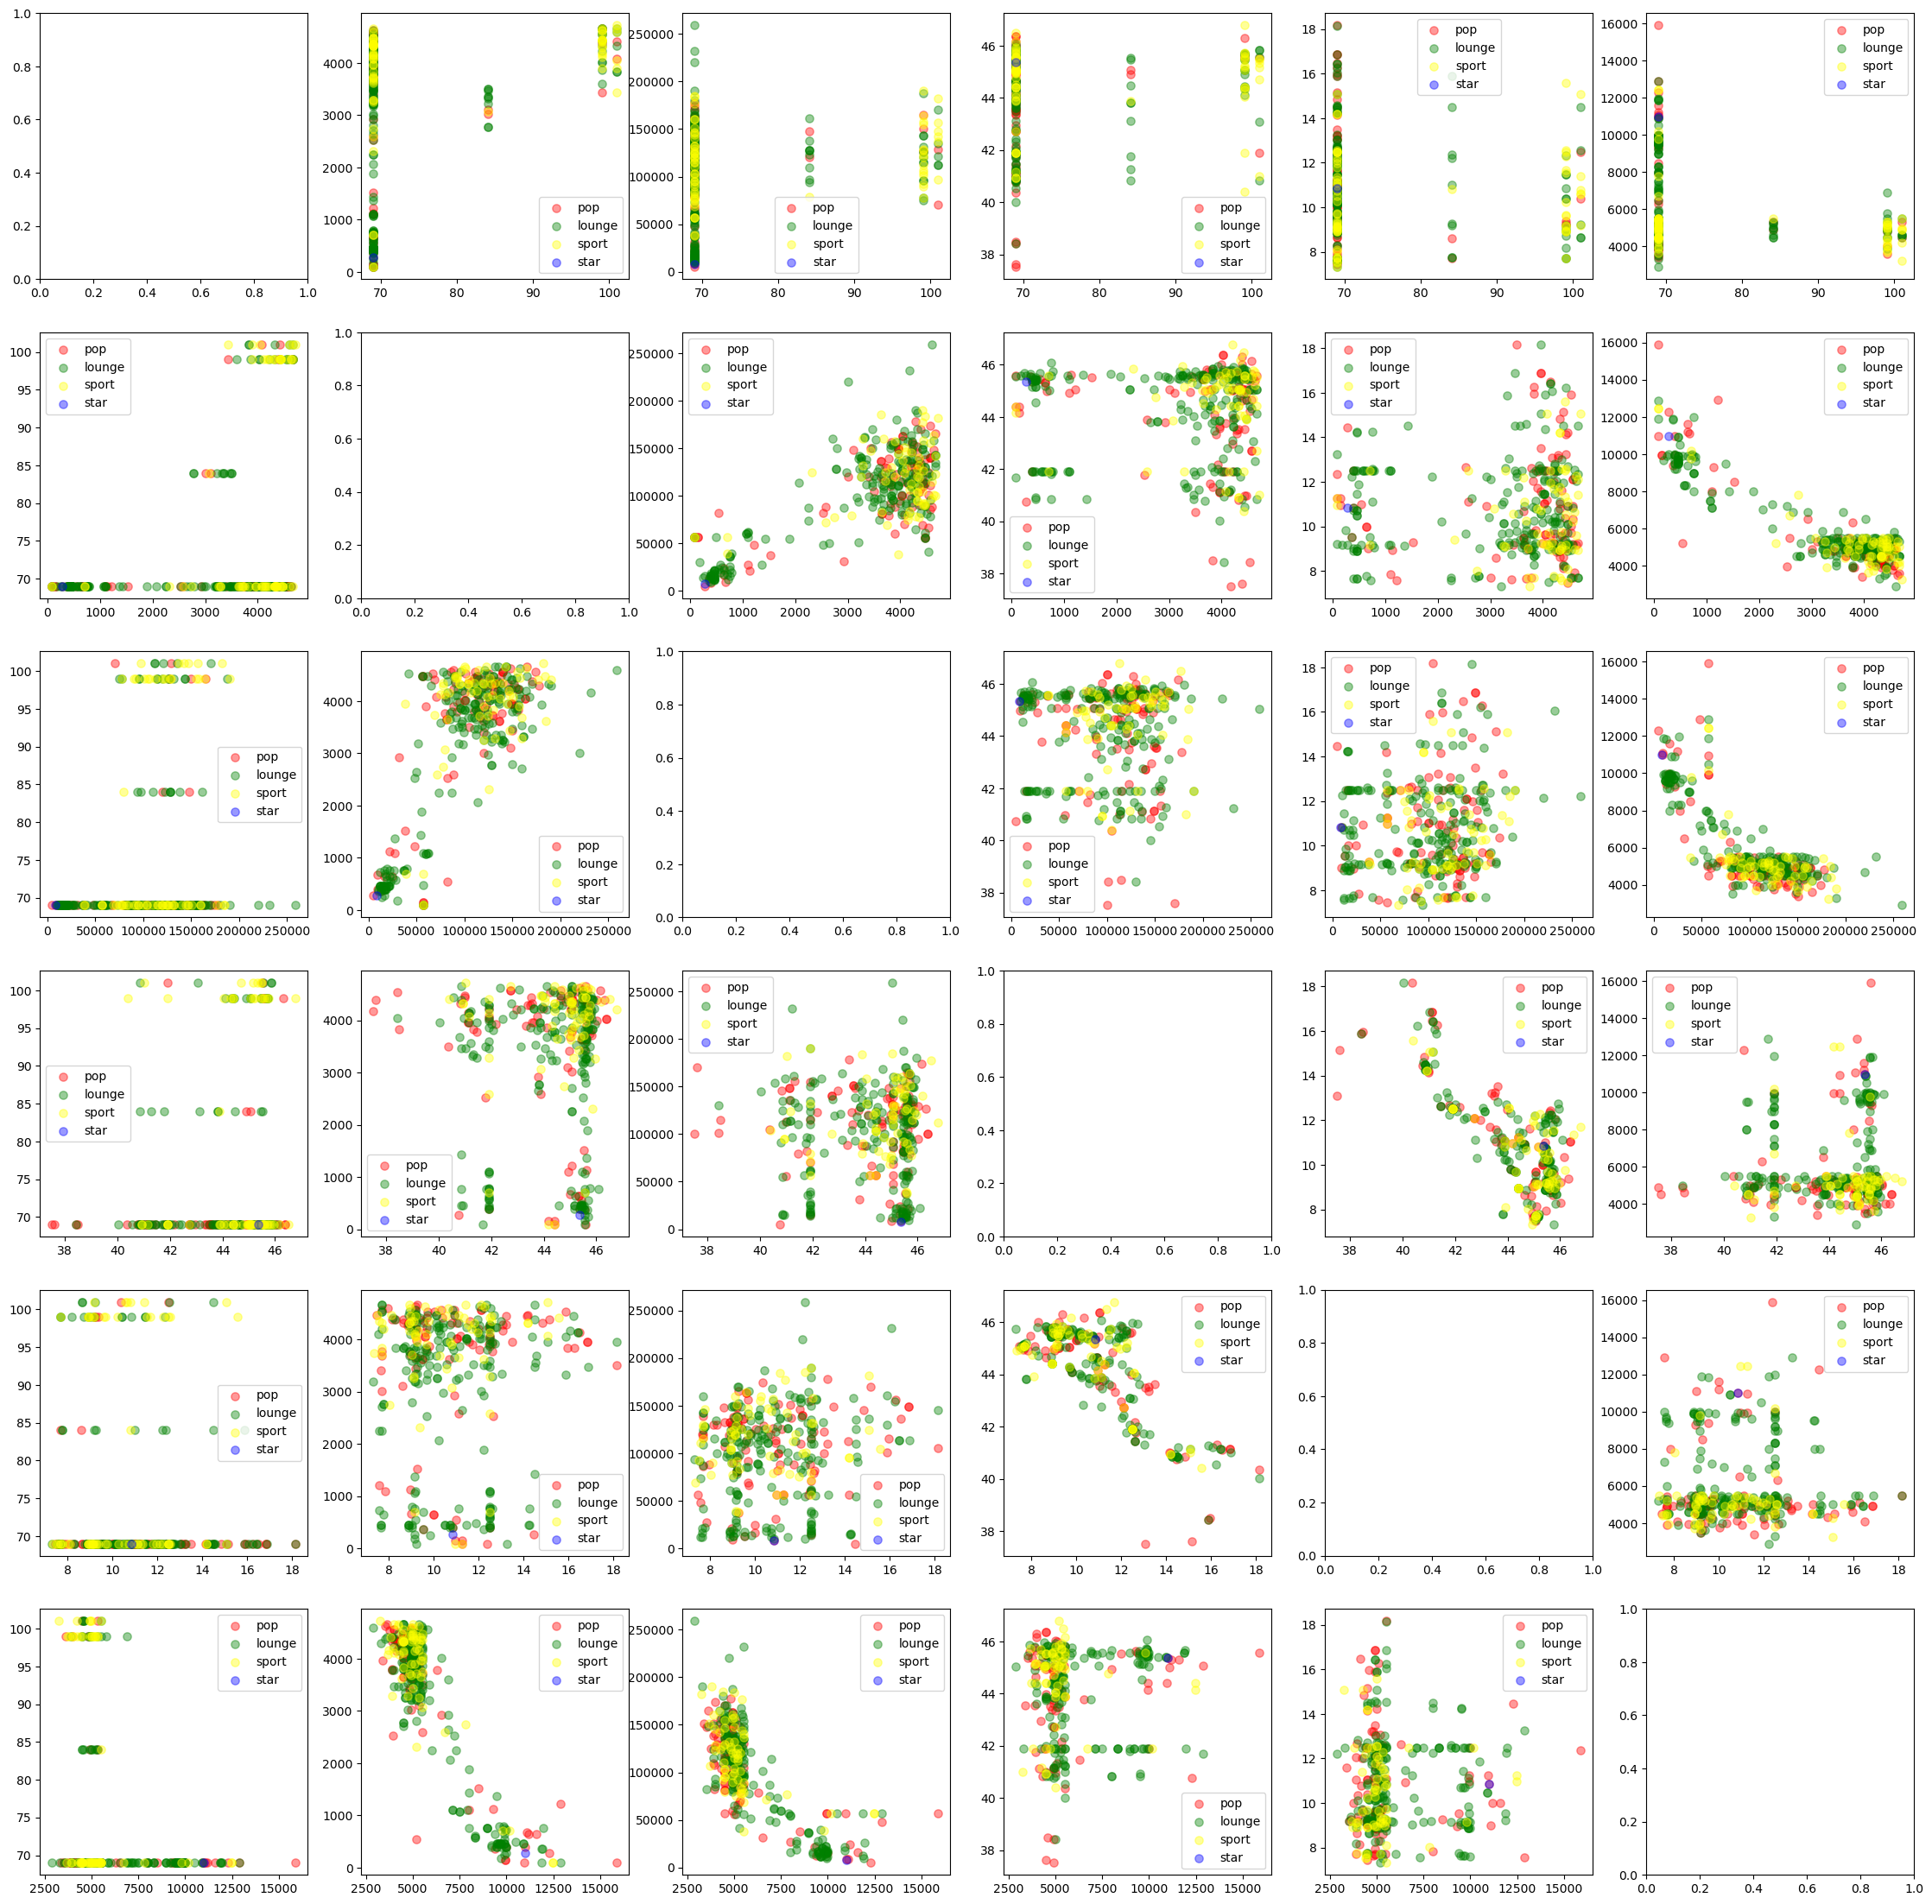

In [39]:
fig, axs = plt.subplots(nrows = 6, ncols = 6, figsize = (28,28))

def scatter_ax(ax,p1,p2):
        models = {'pop': "red", 'lounge': "green", 'sport': "yellow", 'star': "blue"}
        for m in models:
        # print(m)
            model_data = selected_data[selected_data["model"] == m]
            ax.scatter(model_data[p1],model_data[p2], color = models[m], alpha = 0.4, s = 45, label = m)
            ax.legend()
sel_cols = ["engine_power","age_in_days","km","lat","lon","price"]

for i in range(0,6):
    for j in range(0,6):
        if i != j:
            scatter_ax(axs[i][j],sel_cols[i],sel_cols[j])    

plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [6]:
feature = "km"
output = "price"

x = data[feature].to_numpy()
y = data[output].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42, test_size = 0.2)

In [10]:
regressor = LinearRegression() #retta non addestrata

regressor.fit(x_train.reshape(-1,1), y_train)

LinearRegression()

In [15]:
a = regressor.coef_[0] #coefficiente angolare della retta

In [14]:
b = regressor.intercept_ #termine noto

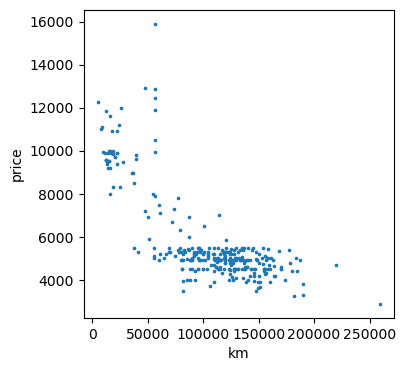

In [26]:
fig, ax = plt.subplots(figsize=(4,4))

ax.scatter(x_train, y_train, s = 2.6)
ax.set_xlabel(feature)
ax.set_ylabel(output)

array_x = np.linspace(0, 250000, 10)
array_y =  a* array_x + b

plt.show()